<a href="https://colab.research.google.com/github/rohitnikam1/Basic_Financial_Analysis/blob/master/6_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**
Linear regression is a technique that measures the relationship between two variables. If we have an independent variable $X$, and a dependent outcome variable $Y$, linear regression allows us to determine which linear model $Y = \alpha + \beta X$ best explains the data. As an example, let's consider TSLA and SPY. We would like to know how TSLA varies as a function of how SPY varies, so we will take the daily returns of each and regress them against each other.

Python's **`statsmodels`** library has a built-in linear fit function. Note that this will give a line of best fit; whether or not the relationship it shows is significant is for you to determine. The output will also have some statistics about the model, such as R-squared and the F value, which may help you quantify how good the fit actually is.

In [1]:
# Import libraries
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


First we'll define a function that performs linear regression and plots the results.

In [2]:
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    
    return model.summary()

Now we'll get pricing data on TSLA and SPY and perform a regression.

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=7a88a1bf169d5dd1f8a91dc721201851cd860f168361993a881629e6b4bbf549
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [9]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [15]:
def get_returns(stocks, start, end):
  '''Get stock returns from tickers'''
  stockData = pdr.get_data_yahoo(stocks, start=start, end=end)
  stockData = stockData['Close']
  returns = stockData.pct_change()
  return returns[1:]

[*********************100%***********************]  2 of 2 completed


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     64.79
Date:                Sat, 16 Oct 2021   Prob (F-statistic):           3.43e-14
Time:                        16:00:12   Log-Likelihood:                 549.38
No. Observations:                 251   AIC:                            -1095.
Df Residuals:                     249   BIC:                            -1088.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.002      0.620      0.536      -0.002       0.004
x1             1.9534      0.243      8.049      0.000       1.475       2.431
==============================================================================
Omnibus:                       64.336   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.056
Skew:                           0.853   Prob(JB):                     1.33e-82
Kurtosis:                       8.757   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

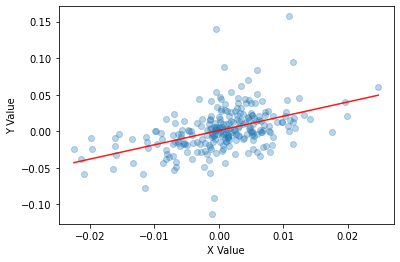

In [18]:
start = '2014-01-01'
end   = '2015-01-01'
returns = get_returns(['TSLA', 'SPY'], start=start, end=end)

linreg(returns['SPY'].values, returns['TSLA'].values)

Each point on the above graph represents a day, with the x-coordinate being the return of SPY, and the y-coordinate being the return of TSLA. As we can see, the line of best fit tells us that for every $1\%$ increased return we see from the SPY, we should see an extra $1.92\%$ from TSLA. This is expressed by the parameter $\beta$, which is $1.9534$ as estimated. Of course, for decreased return we will also see about double the loss in TSLA, so we haven't gained anything, we are just more volatile.

## **Linear Regression vs. Correlation**
 - Linear regression gives us a specific linear model, but is limited to cases of linear dependence.
 - Correlation is general to linear and non-linear dependencies, but doesn't give us an actual model.
 - Both are measures of covariance.
 - Linear regression can give us relationship between Y and many independent variables by making X multidimensional.

## **Knowing Parameters vs. Estimates**
It is very important to keep in mind that all $\alpha$ and $\beta$ parameters estimated by linear regression are just that - estimates. You can never know the underlying true parameters unless you know the physical process producing the data. The parameters you estimate today may not be the same analysis done including tomorrow's data, and the underlying true parameters may be moving. As such it is very important when doing actual analysis to pay attention to the standard error of the parameter estimates. One way to get a sense of how stable your parameter estimates are is to estimate them using a rolling window of data and see how much variance there is in the estimates.


## **Evaluating and reporting results**
The regression model relies on several assumptions:

 - The independent variable is not random.
 - The variance of the error term is constant across observations. This is important for evaluating the goodness of the fit.
 - The errors are not autocorrelated. The Durbin-Watson statistic detects this; if it is close to 2, there is no autocorrelation.
 - The errors are normally distributed. If this does not hold, we cannot use some of the statistics, such as the F-test.

If we confirm that the necessary assumptions of the regression model are satisfied, we can safely use the statistics reported to analyze the fit. For example, the $R^2$ value tells us the fraction of the total variation of $Y$ that is explained by the model.

When making a prediction based on the model, it's useful to report not only a single value but a confidence interval. The linear regression reports $95\%$ confidence intervals for the regression parameters, and we can visualize what this means using the `seaborn` library, which plots the regression line and highlights the $95\%$ (by default) confidence interval for the regression line:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


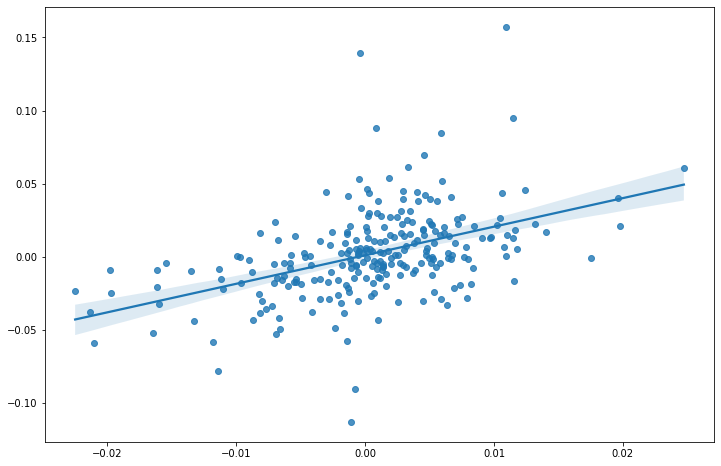

In [22]:
import seaborn

_, _ = plt.subplots(figsize=(12,8))
seaborn.regplot(returns['SPY'].values, returns['TSLA'].values)